<h1>Convolutional Neural Network - Binary Classification</h1>


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files

--2021-07-12 02:27:37--  https://github.com/DanielCozzubo/Tensorflow/raw/master/CNNBinaryClassification/masks_dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanielCozzubo/Tensorflow/master/CNNBinaryClassification/masks_dataset.zip [following]
--2021-07-12 02:27:37--  https://raw.githubusercontent.com/DanielCozzubo/Tensorflow/master/CNNBinaryClassification/masks_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35989156 (34M) [application/zip]
Saving to: ‘/tmp/masks_dataset.zip’

/tmp/masks_dataset. 100%[===================>]  34.32M  41.0MB/s    in 0.8s    

2021-07-12 02:

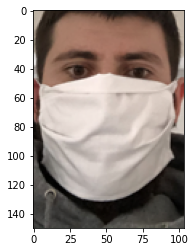

In [2]:
#downloading dataset containing images of people wearing masks incorrectly, wearing masks correctly and not wearing masks
!wget --no-check-certificate https://github.com/DanielCozzubo/Tensorflow/raw/master/CNNBinaryClassification/masks_dataset.zip -O /tmp/masks_dataset.zip
!unzip /tmp/masks_dataset.zip -d /tmp/masks_dataset &> /dev/null
!!rm -r /tmp/masks_dataset/mask_weared_incorrect/ #dropping folder containing images of incorrect use of masks

plt.imshow(mpimg.imread('/tmp/masks_dataset/with_mask/maksssksksss10_0.png')); 

In [3]:
train_data = ImageDataGenerator(rescale=1/255)

train_generator = train_data.flow_from_directory(
    '/tmp/masks_dataset',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 3949 images belonging to 2 classes.


In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      self.model.stop_training = True

In [5]:
callbacks = myCallback()

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),     
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),                        
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, steps_per_epoch=31, epochs=15, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
31/31 [==============================] - 117s 4s/step - loss: 0.9920 - accuracy: 0.8291
Epoch 2/15
31/31 [==============================] - 115s 4s/step - loss: 0.2631 - accuracy: 0.9311
Epoch 3/15
31/31 [==============================] - 115s 4s/step - loss: 0.0973 - accuracy: 0.9663


Saving mask1.jfif to mask1.jfif
Saving mask2.jfif to mask2.jfif
mask1.jfif is wearing mask
mask2.jfif is not wearing mask


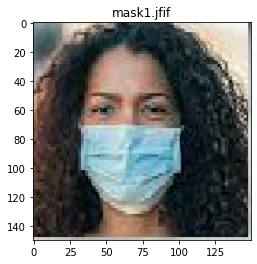

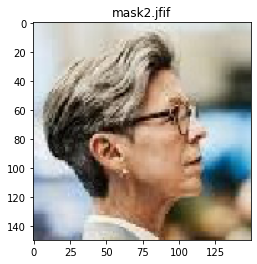

In [6]:
#upload images to prediction
uploaded = files.upload()

for i, fn in enumerate(uploaded.keys()):

  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  
  plt.figure(i+1)
  plt.title(fn)
  plt.imshow(img);
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0]>0.5:
    print(fn + " is not wearing mask")
  else:
    print(fn + " is wearing mask")